In [1]:
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Preprocessing


In [5]:
x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255
x_test = x_test.reshape((-1,28,28,1)).astype('float32') / 255

# Model Definition

In [10]:
import tensorflow as tf

model = keras.Sequential()
model.add(keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu",input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu"))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256,activation="relu"))
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dense(units=10,activation="softmax"))

c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,170 (531.91 KB)

 Trainable params: 136,170 (531.91 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
hist = model.fit(x_train,y_train,epochs=10,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.6842 - loss: 0.9659 - val_accuracy: 0.9515 - val_loss: 0.1470
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9536 - loss: 0.1532 - val_accuracy: 0.9690 - val_loss: 0.0985
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9687 - loss: 0.1028 - val_accuracy: 0.9761 - val_loss: 0.0781
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9758 - loss: 0.0811 - val_accuracy: 0.9764 - val_loss: 0.0724
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.9798 - loss: 0.0650 - val_accuracy: 0.9829 - val_loss: 0.0574
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9837 - loss: 0.0544 - val_accuracy: 0.9809 - val_loss: 0.0624
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9855 - loss: 0.0472 - val_accuracy: 0.9814 - val_loss: 0.0608
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9862 - loss: 0.0440 

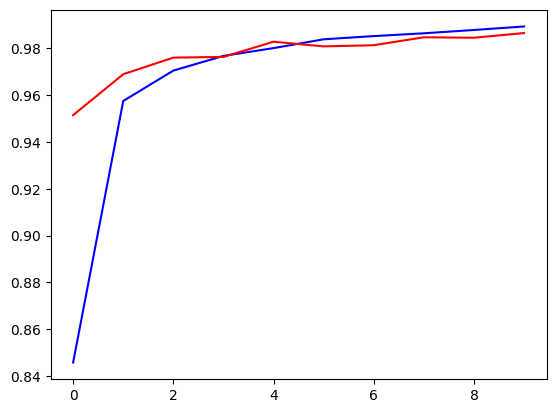

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'],color="blue")
plt.plot(hist.history['val_accuracy'],color="red")